In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import pm4py
from scipy.stats import gaussian_kde
import numpy as np
import pickle

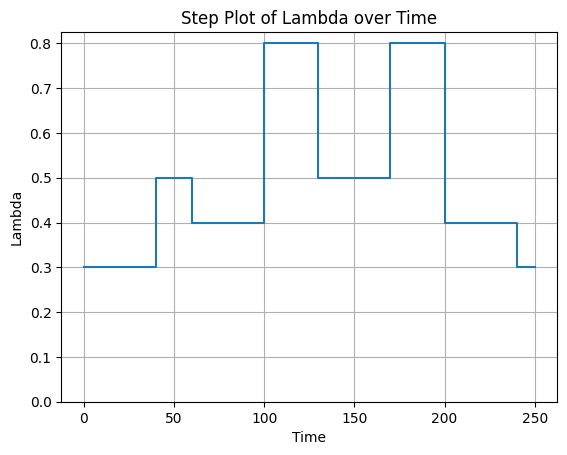

In [3]:
[(40, 0.3), (60, 0.5), (100, 0.4), (130, 0.8), (170, 0.5), (200, 0.8), (240, 0.4), (250, 0.3)]
# Data
start = [0, 40, 60, 100, 130, 170, 200, 240]
end = [40, 60, 100, 130, 170, 200, 240, 250]
lambda_values = [0.3, 0.5, 0.4, 0.8, 0.5, 0.8, 0.4, 0.3]

# Preparing data for step plot
x = []
y = []

for i in range(len(start)):
    x.append(start[i])
    y.append(lambda_values[i])
    if i < len(start) - 1:
        x.append(start[i+1])
        y.append(lambda_values[i])

# Adding the last segment
x.append(end[-1])
y.append(lambda_values[-1])

# Plotting
plt.step(x, y, where='post')
plt.ylim(0)
plt.xlabel('Time')
plt.ylabel('Lambda')
plt.title('Step Plot of Lambda over Time')
plt.grid(True)
plt.show()

In [4]:
log = pm4py.read_xes(r'C:\Users\s144763\OneDrive - TU Eindhoven\Documents\Github\RL_integration\example\BPI_Challenge_2012_W_Two_TS\BPI_Challenge_2012_W_Two_TS.xes')
df = pm4py.convert_to_dataframe(log)
df

c:\Users\s144763\Anaconda3\envs\drl\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
parsing log, completed traces :: 100%|██████████| 8616/8616 [00:06<00:00, 1238.93it/s]


,concept:name,lifecycle:transition,org:resource,time:timestamp,Activity,Resource,start:timestamp,case:concept:name,case:variant,case:variant-index,case:creator
0,W_Completeren aanvraag,complete,10861.0,2011-12-30 12:16:37.140000+00:00,W_Completeren aanvraag,10861.0,2011-12-30 12:14:47.813000+00:00,196611,Variant 7,7,Fluxicon Disco
1,W_Completeren aanvraag,complete,NOT_SET,2011-12-30 17:31:05.999000+00:00,W_Completeren aanvraag,NaN,2011-12-30 12:14:47.813000+00:00,196611,Variant 7,7,Fluxicon Disco
2,W_Completeren aanvraag,complete,NOT_SET,2011-12-30 17:46:24.675000+00:00,W_Completeren aanvraag,NaN,2011-12-30 12:14:47.813000+00:00,196611,Variant 7,7,Fluxicon Disco
3,W_Afhandelen leads,complete,11003.0,2011-12-30 07:55:20.278000+00:00,W_Afhandelen leads,11003.0,2011-12-30 07:51:49.730000+00:00,196614,Variant 176,176,Fluxicon Disco
4,W_Completeren aanvraag,complete,11003.0,2011-12-30 10:52:11.635000+00:00,W_Completeren aanvraag,11003.0,2011-12-30 10:38:42.036000+00:00,196614,Variant 176,176,Fluxicon Disco
...,...,...,...,...,...,...,...,...,...,...,...
59297,W_Nabellen incomplete dossiers,complete,11009.0,2012-02-09 13:48:08.610000+00:00,W_Nabellen incomplete dossiers,11009.0,2012-02-02 13:18:38.282000+00:00,196605,Variant 2115,2115,Fluxicon Disco
59298,W_Nabellen incomplete dossiers,complete,11259.0,2012-02-09 15:37:40.739000+00:00,W_Nabellen incomplete dossiers,11259.0,2012-02-02 13:18:38.282000+00:00,196605,Variant 2115,2115,Fluxicon Disco
59299,W_Valideren aanvraag,complete,11289.0,2012-02-09 17:58:54.652000+00:00,W_Valideren aanvraag,11289.0,2012-02-02 08:45:19.826000+00:00,196605,Variant 2115,2115,Fluxicon Disco
59300,W_Nabellen incomplete dossiers,complete,11289.0,2012-02-09 18:00:12.997000+00:00,W_Nabellen incomplete dossiers,11289.0,2012-02-02 13:18:38.282000+00:00,196605,Variant 2115,2115,Fluxicon Disco


### Arrival pattern for continuous arrivals

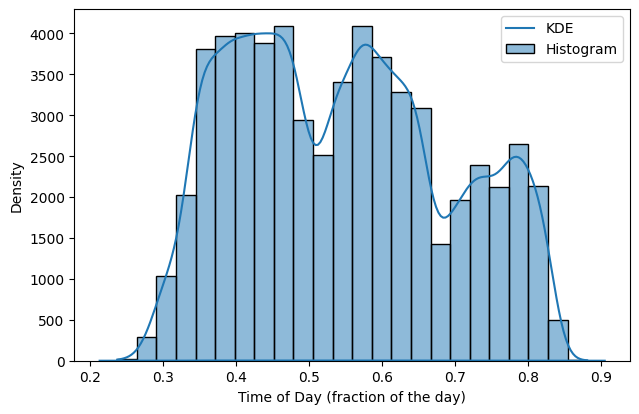

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Assuming df is defined elsewhere and contains the necessary data

df2 = df.groupby('case:concept:name')['start:timestamp'].min()

# Step 1: Convert 'start:timestamp' to datetime if not already
df2['start:timestamp'] = pd.to_datetime(df['start:timestamp'])

# Step 2: Extract the time of day as a fraction of the day (0 to 1)
df2['time_of_day'] = df['start:timestamp'].dt.hour / 24 + df['start:timestamp'].dt.minute / 1440

fig, ax1 = plt.subplots(figsize=(6.5, 4.25))

# Step 3: Plot the density plot of time of day using ax
sns.kdeplot(df2['time_of_day'], bw_adjust=0.5, ax=ax1, label='KDE')
sns.histplot(df2['time_of_day'], bins=24, kde=True, alpha=0.5, label='Histogram', ax=ax1)
ax1.set_xlabel('Time of Day (fraction of the day)')
ax1.set_ylabel('Density')

# Tight layout for better spacing
plt.tight_layout()

# Adding legend for the plot
ax1.legend()
plt.savefig('./figures/arrival_pattern.pdf')
plt.show()


### Arrival pattern for cyclic arrivals

0.49984


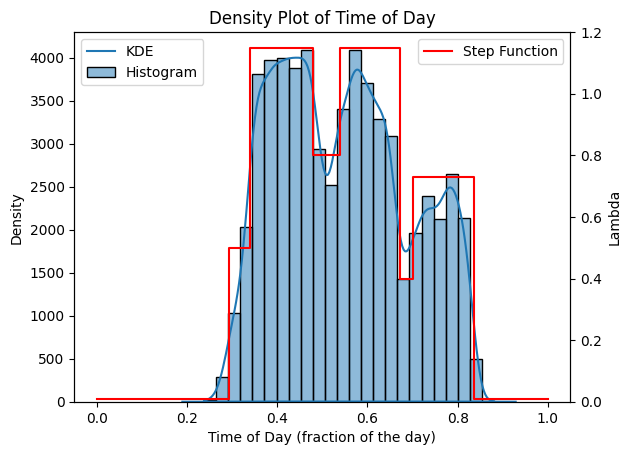

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is defined elsewhere and contains the necessary data

df2 = df.groupby('case:concept:name')['start:timestamp'].min()

# Step 1: Convert 'start:timestamp' to datetime if not already
df2['start:timestamp'] = pd.to_datetime(df['start:timestamp'])

# Step 2: Extract the time of day as a fraction of the day (0 to 1)
df2['time_of_day'] = df['start:timestamp'].dt.hour / 24 + df['start:timestamp'].dt.minute / 1440

fig, ax1 = plt.subplots()

# Step 3: Plot the density plot of time of day using ax
sns.kdeplot(df2['time_of_day'], ax=ax1, label='KDE')
sns.histplot(df2['time_of_day'], bins=24, kde=True, alpha=0.5, label='Histogram', ax=ax1)
ax1.set_xlabel('Time of Day (fraction of the day)')
ax1.set_ylabel('Density')
ax1.set_title('Density Plot of Time of Day')

# Creating a secondary y-axis for the step function
ax2 = ax1.twinx()

# Step function data
step_function = [(73, 0.01), (85, 0.5), (120, 1.15), (135, 0.8), (168, 1.15), (175, 0.4), (209, 0.73), (250, 0.01)]
# Extracting the lambda values and calculating the mean
lambda_values = [j for i, j in step_function]
weights = []
for i in range(len(step_function)):
    if i == 0:
        weights.append(step_function[i][0])
    else:
        weights.append(step_function[i][0] - step_function[i-1][0])
mean_lambda = sum([lambda_values[i] * weights[i] for i in range(len(lambda_values))]) / sum(weights)

print(mean_lambda)
start = [0] + [i for i, j in step_function[:-1]]
end = [i for i, j in step_function]

# Preparing data for step plot
x = []
y = []

for i in range(len(start)):
    x.append(start[i])
    y.append(lambda_values[i])
    if i < len(start) - 1:
        x.append(start[i+1])
        y.append(lambda_values[i])

# Adding the last segment
x.append(end[-1])
y.append(lambda_values[-1])

# Normalizing x values
x = [xi/end[-1] for xi in x]

# Plotting the step function on the secondary y-axis
ax2.step(x, y, where='post', color='r', label='Step Function')
ax2.set_ylim(0, 1.2)  # Adjust as needed
ax2.set_ylabel('Lambda')

# Adding legends for both axes
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

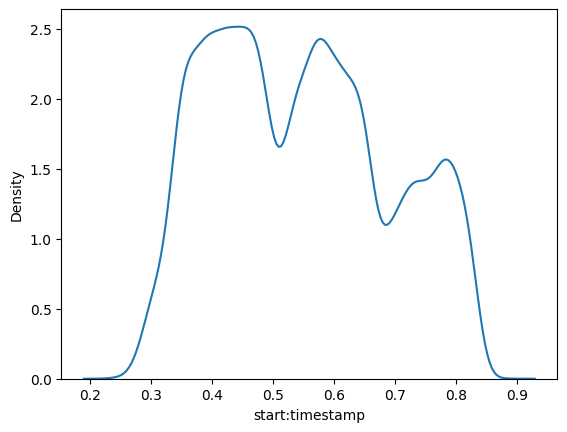

In [7]:
sns.kdeplot(data=df2['time_of_day'])

# Assuming df2['time_of_day'] contains your data points
data = df2['time_of_day']

# Create a KDE object
kde = gaussian_kde(data)  # Adjust bw_method as needed to match your seaborn plot

In [8]:
x = np.linspace(0.2, 0.9, 10000)
kde = gaussian_kde(data)

with open('kde_model.pkl', 'wb') as file:
    pickle.dump(kde, file)


In [9]:
with open('kde_model.pkl', 'rb') as file:
    kde2 = pickle.load(file)

In [10]:
kde_values = kde2(x)

0.5
0.8808648685414641


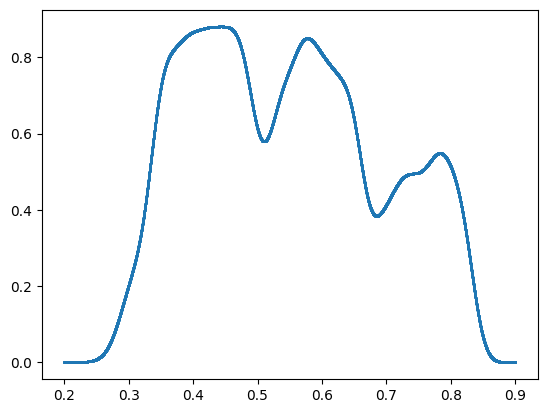

In [11]:
kde_mean = kde_values.mean()
kde_max = kde_values.max()
kde_values2 = [x/kde_mean*0.5 for x in kde_values]
print(np.mean(kde_values2))
plt.scatter(x, kde_values2, s=1)
print(np.max(kde_values2))

In [12]:
time = 125
scaled_time = 0.2 + (time - 0) * (0.9 - 0.2) / (250 - 0)
scaled_time

0.55

In [13]:
import numpy as np
from scipy.stats import gaussian_kde
from scipy.integrate import quad

# Sample data
#data = np.random.normal(0, 1, size=1000)

# Create a KDE from the data
#kde = gaussian_kde(data)

# Define the range over which you want to integrate
range_start = 0
range_end = 1

# Function to integrate (the KDE)
def integrand(x):
    return kde(x)

# Perform the integration over the specified range
integral, _ = quad(integrand, range_start, range_end)

print(f"Integral of the KDE from {range_start} to {range_end}: {integral}")

Integral of the KDE from 0 to 1: 0.9999999999999831


In [14]:
intervals = [x_points[0]] + [x_points[i] - x_points[i-1] for i in range(1,len(x_points))]
sum([kde_values[i] * intervals[i] for i in range(len(kde_values))])


NameError: name 'x_points' is not defined

1.6851902167594963


(array([  10.,   23.,   13.,   12.,   19.,   12.,   17.,   24.,   27.,
          20.,   19.,   16.,   13.,   20.,   24.,   34.,   33.,   13.,
          23.,   23.,   27.,   20.,   28.,   29.,   33.,   26.,   27.,
          20.,   28.,   33.,   34.,   37.,   38.,   45.,   37.,   41.,
          38.,   53.,   34.,   29.,   57.,   45.,   39.,   59.,   58.,
          41.,   55.,   47.,   50.,   55.,   58.,   59.,   75.,   59.,
          85.,   71.,   71.,   72.,   81.,   91.,   87.,   81.,  102.,
         106.,   96.,  110.,   89.,   83.,  103.,  104.,  104.,  111.,
         115.,   90.,  104.,   95.,   87.,  106.,  112.,  110.,  112.,
         118.,  130.,  148.,  123.,  161.,  137.,  151.,  137.,  176.,
         183.,  186.,  221.,  258.,  290.,  374.,  404.,  482.,  606.,
        1328.]),
 array([0.00789613, 0.02980334, 0.05171056, 0.07361777, 0.09552498,
        0.11743219, 0.13933941, 0.16124662, 0.18315383, 0.20506104,
        0.22696825, 0.24887547, 0.27078268, 0.29268989, 0.3145971 

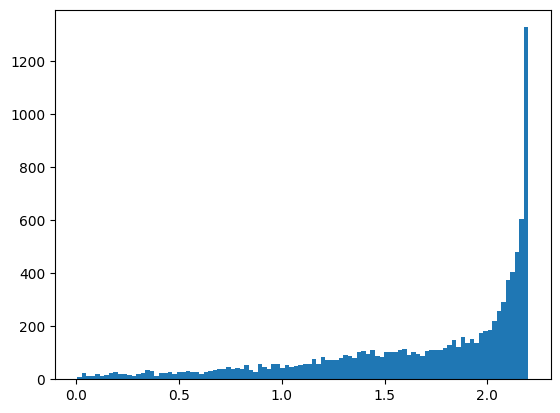

In [ ]:
# Randomly generate values and insert into KDE
random_values = kde.resample(10000)
kde_values = kde(random_values)
#kde_values = [x/1.682*0.5 for x in kde_values]
# Calculate the average of the generated values
average = np.mean(kde_values)

print(average)

plt.hist(kde_values, bins=100)

In [ ]:
kde(0.5)

array([1.75055018])